After importing the three final datasets we obtained from scraping and preprocessing, we take care of the *time* column to change it from data type str to data type datetime, so that when we are plotting it will go in order.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

df_desktop = pd.read_json('../data/academy_monthly_desktop_start201507-end202310.json')
df_mobile = pd.read_json('../data/academy_monthly_mobile_start201507-end202310.json')
df_cumu = pd.read_json('../data/academy_monthly_cumulative_start201507-end202310.json')

### Maximum Average and Minimum Average

In the first graph, we visualize the time series of the articles that have the highest average monthly page requests and the lowest average monthly page requests for desktop access and mobile access.

To find out which articles have the highest/lowest monthly page request, we group by the article column and obtain the average aggregation by the mean function. Then, to find out the highest and lowest together, we sort by the average and take out the first and the last from the sorted dataframe. The group by function results in multi-index dataframe, therefore we reset index to directly retrieve the column we are interested in.

We do the above separately for the desktop and the mobile dataframes.

In [2]:
sortedDesktop = df_desktop.groupby(by=["article"]).mean().sort_values(by=['views'], ascending=False).reset_index()

maxDesktop = sortedDesktop.iloc[0]['article']
minDesktop = sortedDesktop.iloc[-1]['article']

In [3]:
sortedMobile = df_mobile.groupby(by=["article"]).mean().sort_values(by=['views'], ascending=False).reset_index()

maxMobile = sortedMobile.iloc[0]['article']
minMobile = sortedMobile.iloc[-1]['article']

Here we try to validate the results obtained by printing out the articles and check their average pageviews.

In [4]:
print(maxDesktop + ': ' + str(df_desktop[df_desktop['article']==maxDesktop]['views'].mean()))
print(minDesktop + ': ' + str(df_desktop[df_desktop['article']==minDesktop]['views'].mean()))
print(maxMobile + ': ' + str(df_desktop[df_desktop['article']==maxMobile]['views'].mean()))
print(minMobile + ': ' + str(df_desktop[df_desktop['article']==minMobile]['views'].mean()))


Joker_(2019_film): 216853.25396825396
Project_Hope_(film): 36.61616161616162
The_Whale_(2022_film): 195752.93333333332
Project_Hope_(film): 36.61616161616162


Text(0, 0.5, 'Page Views Count (1e6)')

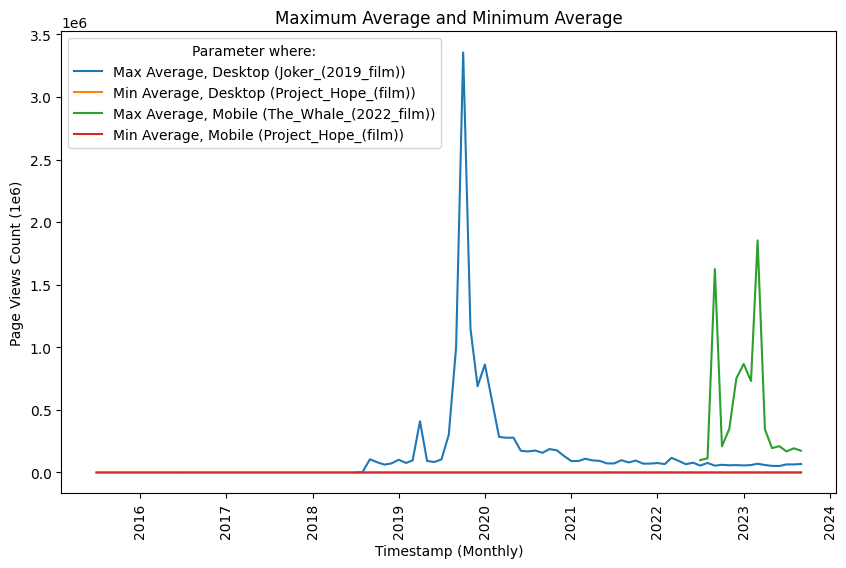

In [5]:
plt.figure(figsize=(10,6))
plt.xticks(rotation='vertical')
plt.title('Maximum Average and Minimum Average')
plt.plot(df_desktop[df_desktop['article']==maxDesktop]['timestamp'],
         df_desktop[df_desktop['article']==maxDesktop]['views'], 
         label='Max Average, Desktop ('+maxDesktop+')')
plt.plot(df_desktop[df_desktop['article']==minDesktop]['timestamp'],
         df_desktop[df_desktop['article']==minDesktop]['views'],
         label='Min Average, Desktop ('+minDesktop+')')
plt.plot(df_mobile[df_mobile['article']==maxMobile]['timestamp'],
         df_mobile[df_mobile['article']==maxMobile]['views'],
         label='Max Average, Mobile ('+maxMobile+')')
plt.plot(df_mobile[df_mobile['article']==minMobile]['timestamp'],
         df_mobile[df_mobile['article']==minMobile]['views'],
         label='Min Average, Mobile ('+minMobile+')')
plt.legend(title='Parameter where:')
plt.xlabel("Timestamp (Monthly)")
plt.ylabel("Page Views Count (1e6)")

Since both minimum averages from desktop and mobile are too small to distinguish from each other in the last graph, we will display only the two of them below.

Text(0, 0.5, 'Page Views Count (1e6)')

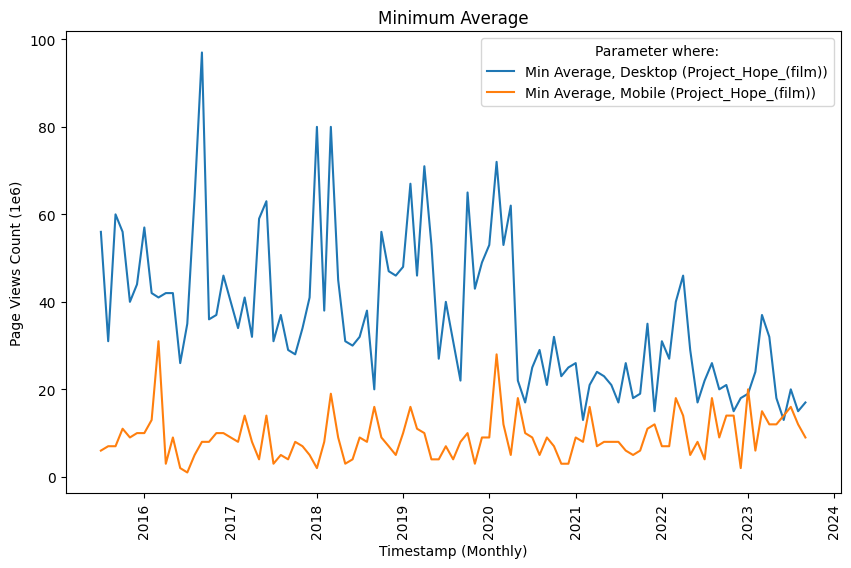

In [6]:
plt.figure(figsize=(10,6))
plt.xticks(rotation='vertical')
plt.title('Minimum Average')
# plt.plot(df_desktop[df_desktop['article']==maxDesktop]['timestamp'],
#          df_desktop[df_desktop['article']==maxDesktop]['views'], 
#          label='Max Average, Desktop ('+maxDesktop+')')
plt.plot(df_desktop[df_desktop['article']==minDesktop]['timestamp'],
         df_desktop[df_desktop['article']==minDesktop]['views'],
         label='Min Average, Desktop ('+minDesktop+')')
# plt.plot(df_mobile[df_mobile['article']==maxMobile]['timestamp'],
#          df_mobile[df_mobile['article']==maxMobile]['views'],
#          label='Max Average, Mobile ('+maxMobile+')')
plt.plot(df_mobile[df_mobile['article']==minMobile]['timestamp'],
         df_mobile[df_mobile['article']==minMobile]['views'],
         label='Min Average, Mobile ('+minMobile+')')
plt.legend(title='Parameter where:')
plt.xlabel("Timestamp (Monthly)")
plt.ylabel("Page Views Count (1e6)")

### Top 10 Peak Page Views

The second graph is to display the time series of the 10 articles pages from desktop access and the 10 articles from mobile access that have the views peaked over the entire time from 2015 to 2023 among all articles. In order to do that, we find out the peak views from all months for each article. Then we sort their peaks descendingly to find out the top 10 peak views. Then we could use the article name obtained to plot each time series.

This will be done separately with desktop and mobile accesses.

In [7]:
articles = df_desktop['article'].unique()
df_peakDesktop = pd.DataFrame()
for article in articles:
    df_article = df_desktop[df_desktop['article']==article]
    views = df_article.max().views
    month = df_article[df_article['views']==views]['timestamp'].tolist()[0]
    df2 = {'article': article, 'peakMonth': month, 'peakViews': views}
    df_peakDesktop = df_peakDesktop.append(df2, ignore_index = True)

In [8]:
top10_desktop = df_peakDesktop.sort_values(by=['peakViews'], ascending=False)[:10]

In [9]:
articles = df_mobile['article'].unique()
df_peakMobile = pd.DataFrame()
for article in articles:
    df_article = df_mobile[df_mobile['article']==article]
    views = df_article.max().views
    month = df_article[df_article['views']==views]['timestamp'].tolist()[0]
    df2 = {'article': article, 'peakMonth': month, 'peakViews': views}
    df_peakMobile = df_peakMobile.append(df2, ignore_index = True)

In [10]:
top10_mobile = df_peakMobile.sort_values(by=['peakViews'], ascending=False)[:10]

Text(0, 0.5, 'Page Views Count (1e6)')

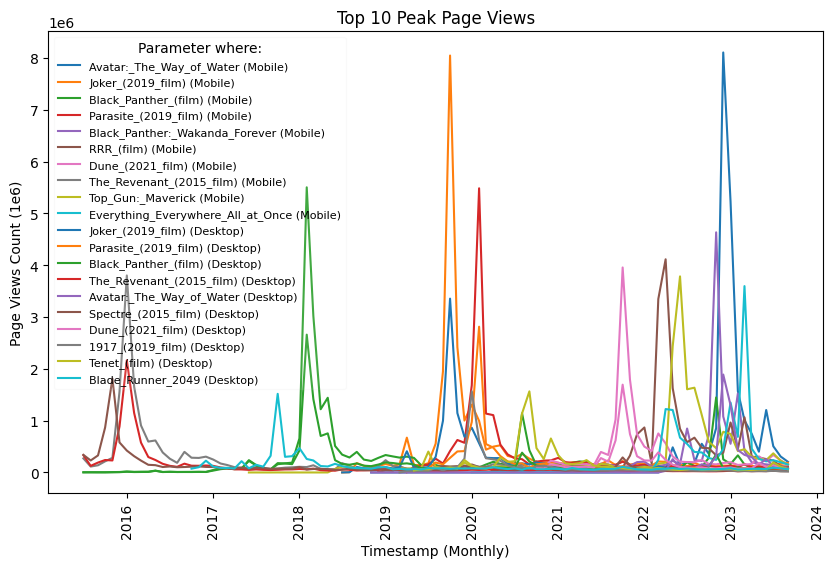

In [11]:
plt.figure(figsize=(10,6))
plt.xticks(rotation='vertical')
plt.title('Top 10 Peak Page Views')
for article in top10_mobile['article'].tolist():
    plt.plot(df_mobile[df_mobile['article']==article]['timestamp'],
             df_mobile[df_mobile['article']==article]['views'],
             label=article+' (Mobile)')
for article in top10_desktop['article'].tolist():
    plt.plot(df_desktop[df_desktop['article']==article]['timestamp'],
             df_desktop[df_desktop['article']==article]['views'],
             label=article+' (Desktop)')
plt.legend(title='Parameter where:', framealpha=0.1, prop={'size': 8})
plt.xlabel("Timestamp (Monthly)")
plt.ylabel("Page Views Count (1e6)")

### Fewest Months of Data

The third graph tends to show articles that have the fewest months of available data. We first group by the article, then we could count the number of months that each article has available data for. We sort by the count ascendingly and take out the article name from the first 10 rows of data and plot the time series of each of the 10 articles.

We do this with desktop and mobile accesses separately.

In [12]:
fewest_month_mobile = df_mobile.groupby(by=['article']).count().sort_values(by=['views'], ascending=True)[:10]

In [13]:
fewest_month_mobile

,timestamp,views
article,,
"The_Boy,_the_Mole,_the_Fox_and_the_Horse_(film)",10,10
The_Elephant_Whisperers,10,10
Women_Talking_(film),11,11
Eskimo_(1933_film),12,12
The_Whale_(2022_film),15,15
The_Critic_(1963_film),15,15
The_Windshield_Wiper,20,20
The_Queen_of_Basketball,20,20
Guillermo_del_Toro's_Pinocchio,21,21


In [14]:
fewest_month_desktop = df_desktop.groupby(by=['article']).count().sort_values(by=['views'], ascending=True)[:10]

In [15]:
fewest_month_desktop

,timestamp,views
article,,
"The_Boy,_the_Mole,_the_Fox_and_the_Horse_(film)",10,10
The_Elephant_Whisperers,10,10
Women_Talking_(film),11,11
Eskimo_(1933_film),12,12
The_Whale_(2022_film),15,15
The_Critic_(1963_film),15,15
The_Windshield_Wiper,20,20
The_Queen_of_Basketball,20,20
Guillermo_del_Toro's_Pinocchio,21,21


We could see from the above that the 10 articles from desktop and the 10 from mobile accesses are the same articles. The finding might not be at all surprised since the release date or the date of the creation of the pages are the same for different accesses for the same article.

Text(0, 0.5, 'Page Views Count (1e6)')

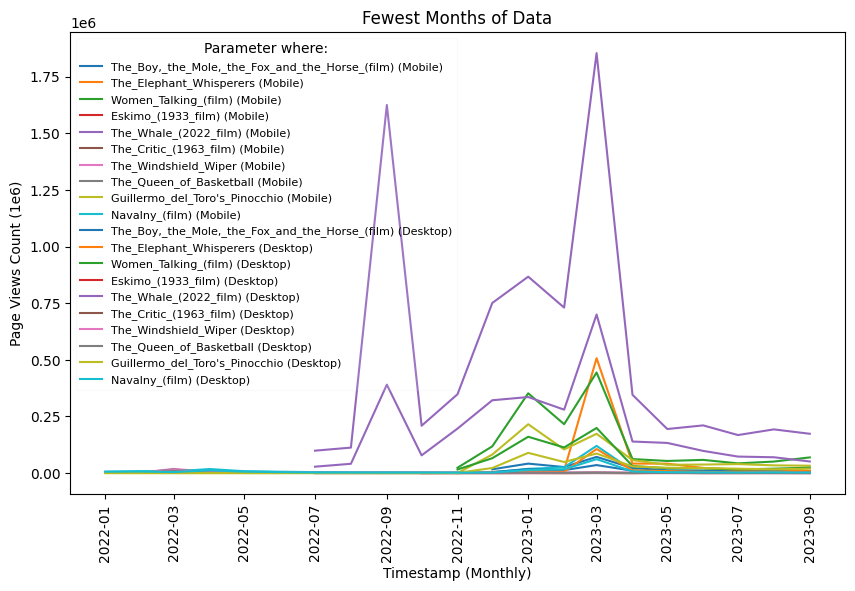

In [16]:
plt.figure(figsize=(10,6))
plt.xticks(rotation='vertical')
plt.title('Fewest Months of Data')
for article in fewest_month_mobile.index.tolist():
    plt.plot(df_mobile[df_mobile['article']==article]['timestamp'],
             df_mobile[df_mobile['article']==article]['views'],
             label=article+' (Mobile)')
for article in fewest_month_desktop.index.tolist():
    plt.plot(df_desktop[df_desktop['article']==article]['timestamp'],
             df_desktop[df_desktop['article']==article]['views'],
             label=article+' (Desktop)')
plt.legend(title='Parameter where:',framealpha=0.1, prop={'size': 8})
plt.xlabel("Timestamp (Monthly)")
plt.ylabel("Page Views Count (1e6)")